In [1]:
# import numpy
%pylab inline
rcParams["font.size"] = 25
# cd the working directory
!cd /Users/cham/PycharmProjects/spectroscopy/stellar_parameters/demo_slam/

Populating the interactive namespace from numpy and matplotlib


## load parameters

In [2]:
from astropy.table import Table
params = Table.read("./params.fits")

## take a look at the parameters

In [3]:
params

teff,logg,feh,rv,fps
K,dex,,km / s,
float32,float32,float32,float32,bytes47
4823.05,2.453,-0.313,15.13,spec-56919-KP190651N485531V01_sp03-224.fits.gz
6859.56,4.059,0.099,18.29,spec-56627-GAC056N46V1_sp03-089.fits.gz
5571.72,4.544,-0.233,-15.58,spec-57695-HD080028S045247V01_sp12-181.fits.gz
6351.85,4.082,-0.454,-24.03,spec-58171-HD160623N052445V01_sp01-123.fits.gz
6037.46,4.191,-0.147,-41.03,spec-56550-EG223636N114147V01_sp12-047.fits.gz
6431.9,4.294,-0.089,13.14,spec-56649-GAC126S04V2_sp01-103.fits.gz
7742.26,3.916,0.214,53.15,spec-56646-VB061N34V3_sp11-248.fits.gz
5957.94,4.511,0.121,17.23,spec-57816-HD054539N204142V01_sp06-212.fits.gz


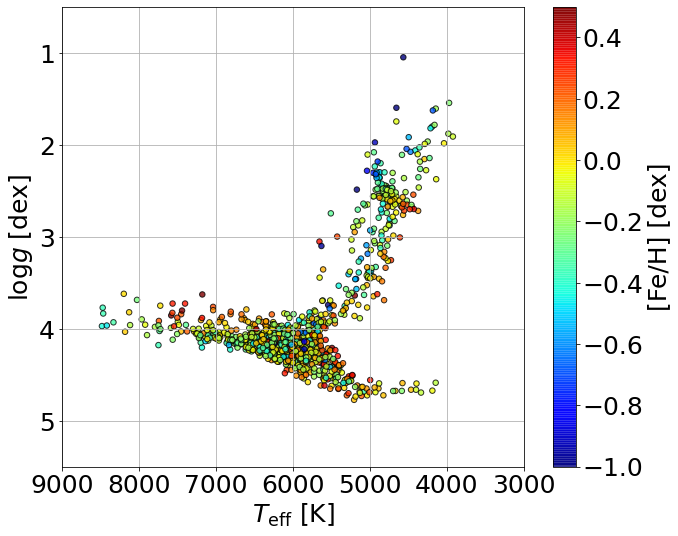

In [4]:
fig = figure(figsize(10, 8))
scatter(params["teff"], params["logg"], s=30, c=params["feh"], marker="o", edgecolors="k", alpha=.8, cmap=cm.jet, vmin=-1, vmax=0.5)
c = colorbar()
c.set_label("[Fe/H] [dex]")
grid(True)
xlim(9000, 3000)
ylim(5.5,0.5)
xlabel("$T_\mathrm{eff}$ [K]")
ylabel("$\log{g}$ [dex]")
fig.tight_layout()

## check filepath

In [5]:
import os
default_status = True
for i in range(len(params)):
    if not os.path.exists("./spectra/"+params[i]["fps"]):
        print("{} not found!")
        default_status = False
if default_status:
    print("all files found")
else:
    print("not all files found")

all files found


## an example of reading spectra

Text(0, 0.5, 'Normalized Flux')

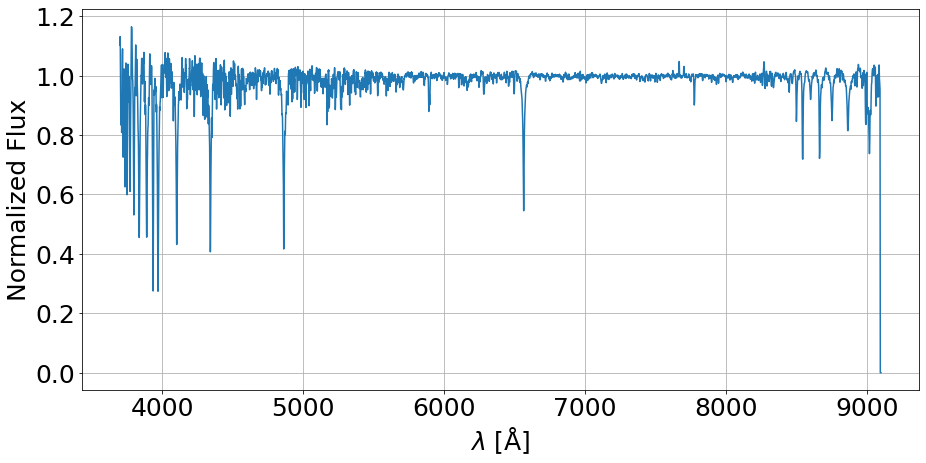

In [6]:
from laspec.mrs import MrsSpec
ms = MrsSpec.from_lrs("./spectra/"+params["fps"][149], norm_type="spline", niter=3)
fig = figure(figsize=(15, 7))
ms.plot_norm()
grid(True)
xlabel("$\lambda$ [$\mathrm{\AA}$]")
ylabel("Normalized Flux")

## define wavelength grid

In [7]:
wave = np.arange(4000, 5500, 1.)
npix = len(wave)
nobs = len(params)

In [8]:
i=0
MrsSpec.from_lrs("./spectra/"+params["fps"][i], norm_type="spline", niter=3).flux_norm

array([0.9213948, 1.1533067, 1.0667824, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

## read spectra in parallel

In [9]:
import joblib
# read spectra
ms_list = joblib.Parallel(backend="multiprocessing", n_jobs=-1, verbose=10)(
    joblib.delayed(MrsSpec.from_lrs)("./spectra/"+params["fps"][i], norm_type="spline", niter=3) for i in range(nobs))
# save spectra
joblib.dump(ms_list, "ms_list.dump")

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1970s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1845s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.4s
[P

['ms_list.dump']

## alternatively, you can directly load the spectra from the dump file

In [10]:
# # load spectra
# import joblib
# ms_list = joblib.load("ms_list.dump")

## interpolate normalized spectra to the defined wavelength grid

In [11]:
flux_norm = np.array([np.interp(wave, ms.wave, ms.flux_norm) for ms in ms_list])
ivar_norm = np.array([np.interp(wave, ms.wave, ms.flux_norm_err**-2) for ms in ms_list])

## take a look at spectra

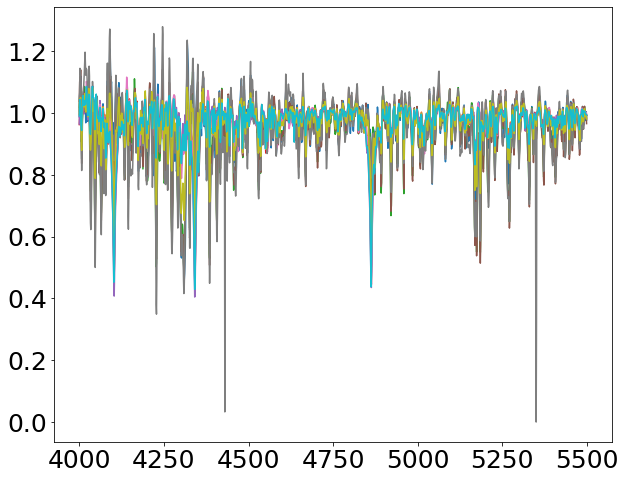

In [12]:
plot(wave, flux_norm[::100].T)

## initiate SLAM

In [13]:
from slam import Slam
s = Slam(wave, # wavelength grid
         tr_flux=flux_norm, # training flux
         tr_ivar=ivar_norm, # training ivar
         tr_labels=np.array(params["teff","logg", "feh"].to_pandas()), # training labels
         scale=True, # if True, scale flux and labels. default is True
         robust=False, # if True, use robust scaling. default is True --> this is to tackle the cosmic rays
         mask_conv=(1, 2), # lower and upper limits of the kernel used in convolution
         flux_bounds=(0.001, 100.0), # flux bounds. 
         ivar_eps=0, # slam will eliminate the pixels whose ivar<ivar_eps
        )

/Users/cham/anaconda3/lib/python3.8/site-packages/slam/slam3.py:1699: RuntimeWarning: invalid value encountered in greater
  ind_ivar_valid = ivar > ivar_eps


@Slam.heal_the_world: IVAR of 122 spectra need to be reset
(2, 8), (3, 16), (22, 7), (33, 17), (34, 36), (40, 180), (42, 6), (46, 8), (49, 10), (57, 39), (74, 8), (76, 8), (92, 7), (93, 7), (105, 7), (116, 8), (135, 9), (141, 7), (157, 22), (160, 8), (193, 70), (207, 234), (215, 7), (220, 7), (221, 40), (222, 19), (231, 58), (235, 59), (250, 8), (266, 8), (274, 7), (280, 6), (285, 7), (290, 20), (297, 367), (314, 31), (321, 36), (323, 7), (325, 8), (334, 256), (339, 30), (342, 8), (344, 8), (373, 72), (395, 184), (402, 133), (416, 8), (418, 6), (427, 162), (431, 30), (432, 149), (434, 21), (435, 14), (443, 181), (446, 7), (476, 31), (477, 28), (483, 311), (496, 119), (499, 13), (501, 22), (503, 36), (508, 7), (517, 7), (526, 390), (544, 11), (551, 9), (554, 6), (557, 8), (568, 22), (576, 92), (588, 144), (590, 7), (597, 32), (610, 15), (618, 41), (635, 20), (636, 8), (640, 7), (641, 8), (655, 21), (670, 303), (683, 8), (684, 105), (691, 8), (693, 53), (699, 507), (700, 33), (701, 17), 

In [14]:
print(s)

Slam3 instance:
tr_flux............: ( 1000 x 1500 )
tr_ivar............: ( 1000 x 1500 )
tr_labels..........: ( 1000 x 3 )
--------------------------------------
tr_flux_scaled.....: ( 1000 x 1500 )
tr_ivar_scaled.....: ( 1000 x 1500 )
tr_labels_scaled...: ( 1000 x 3 )
--------------------------------------
scale..............: True
robust.............: False
mask_conv..........: (1, 2)
flux_bounds........: (0.001, 100.0)
ivar_eps...........: 0
--------------------------------------
model..............: untrained
sms................: list[0]
scores.............: list[0]
hyper-parameters...: Table[length=0]
trained............: False
replicated.........: False


## train SLAM

In [15]:
# train pixels
# 1. defind hyperparameter grid
pgrid = {"C":[-1,0,1],"gamma":[1,],"epsilon":[0.05,],}
# 2. train pixels
s.train_pixels(
    profile=None, targets='all', temp_dir=None, sample_weight_scheme='bool', # usually you can leave these unchanged
    model='svr', # model type: svr/nn
    method='grid', # simple/grid. if simple, specify hyperparameter values; if grid, specify the grid
    param_grid=pgrid, # the grid
    cv=3, # cv fold
    scoring='neg_mean_squared_error', 
    n_jobs=-1, verbose=5, backend="multiprocessing") # parallel

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   37.4s


         C  gamma  epsilon
count  0.0    0.0      0.0
mean   NaN    NaN      NaN
std    NaN    NaN      NaN
min    NaN    NaN      NaN
25%    NaN    NaN      NaN
50%    NaN    NaN      NaN
75%    NaN    NaN      NaN
max    NaN    NaN      NaN


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   38.3s finished


## initial estimation

In [16]:
# get initial estimate of parameters by chi2 best match
Xinit = s.predict_labels_quick(s.tr_flux, s.tr_ivar)

@Slam.heal_the_world: IVAR of 0 spectra need to be reset


@Slam.heal_the_world: FLUX of 0 spectra need to be reset



## SLAM prediction

In [17]:
#optimize parameters
Rpred = s.predict_labels_multi(Xinit[::100], s.tr_flux[::100], s.tr_ivar[::100])
Xpred = np.array([_["x"] for _ in Rpred])

@Slam.heal_the_world: IVAR of 0 spectra need to be reset


@Slam.heal_the_world: FLUX of 0 spectra need to be reset

@SLAM: NMSE is not available and will be calculated now!
@SLAM: The spectra with fewest pixels unmasked is [1427/1500]
@SLAM3: nfev=13, status=2, pstd=[1.23211402e+01 2.48435385e-02 1.10507973e-02]
@SLAM3: nfev=5, status=2, pstd=[7.47393491e+00 1.11342058e-02 7.46281291e-03]
@SLAM3: nfev=13, status=2, pstd=[9.79352056 0.01084266 0.01062718]
@SLAM3: nfev=6, status=2, pstd=[7.36336982e+00 1.03767305e-02 7.16952050e-03]
@SLAM3: nfev=13, status=2, pstd=[8.70378888 0.01949145 0.01186212]
@SLAM3: nfev=9, status=2, pstd=[8.05100870e+00 1.14229963e-02 7.61182079e-03]
@SLAM3: nfev=6, status=2, pstd=[8.85611574e+00 1.23618359e-02 5.67777762e-03]
@SLAM3: nfev=19, status=2, pstd=[1.37839471e+01 1.79278844e-02 7.35375127e-03]
@SLAM3: nfev=7, status=2, pstd=[8.34044303 0.01226595 0.00995697]
@SLAM3: nfev=27, status=2, pstd=[8.12379556 0.01387118 0.00824811]


## compare labels

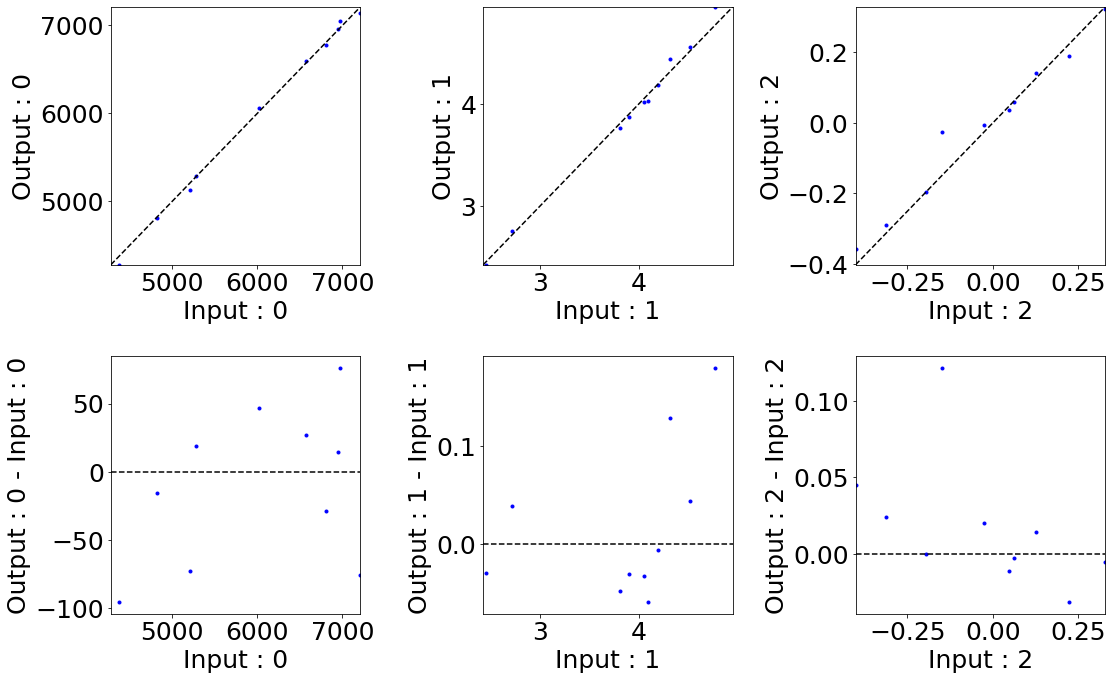

In [22]:
from slam.diagnostic import compare_labels
fig = compare_labels(s.tr_labels[::100], Xpred, labelname1="Input", labelname2="Output",figsize=(16, 10))

## check MSE (goodness of training)

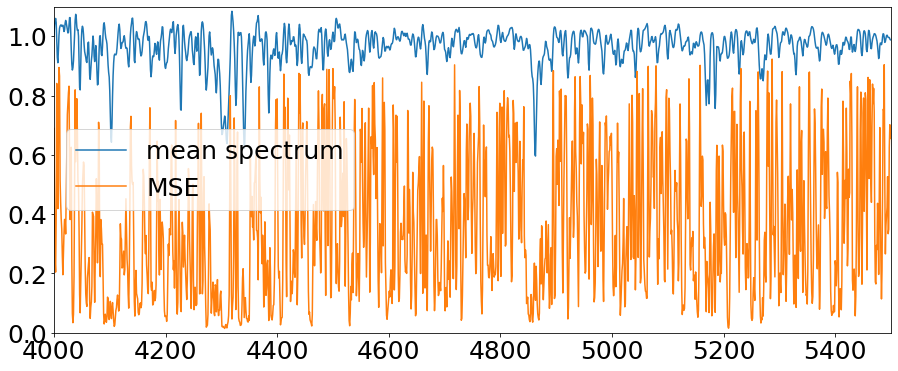

In [23]:
fig = figure(figsize=(15, 6))
plot(s.wave, np.median(s.tr_flux, axis=0), label="mean spectrum")
plot(s.wave, -s.nmse, label="MSE")
xlim(4000, 5500)
ylim(0, 1.1)
legend()

In [24]:
# have fun with slam!